In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [3]:

df = pd.read_csv('/content/house_data.csv')

df['year'] = df['date'].str[:4].astype(int)
df['house_age'] = np.NaN

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,house_age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,NaN
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,NaN
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,NaN
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,NaN
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,NaN


In [6]:
for i,j in enumerate(df['yr_renovated']):
    if (j==0):
        df['house_age'][i] = df['year'][i] - df['yr_built'][i]
    else:
        df['house_age'][i] = df['year'][i] - df['yr_renovated'][i]
print('done')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


done


In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,house_age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,23.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28.0


In [8]:
df.drop(['date','yr_built','yr_renovated','year','id','lat','zipcode','long'], axis=1, inplace=True)

In [9]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,23.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28.0


In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1986.552492,12768.455652,40.936936
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,685.391304,27304.179631,28.813643
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,399.000000,651.000000,-1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000,15.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000,37.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.000000,60.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000,115.000000


In [11]:
df = df[df['house_age']!=-1]

In [12]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age
count,2.159500e+04,21595.000000,21595.000000,21595.000000,2.159500e+04,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000
mean,5.401024e+05,3.370688,2.114367,2079.528734,1.511339e+04,1.493887,0.007548,0.233897,3.409771,7.656263,1788.228201,291.300533,1986.570456,12772.654087,40.971892
std,3.672462e+05,0.929776,0.770035,918.132213,4.143640e+04,0.539695,0.086553,0.765431,0.650907,1.175438,828.069917,442.292368,685.487764,27314.551748,28.800189
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,399.000000,651.000000,0.000000
25%,3.215000e+05,3.000000,1.750000,1428.500000,5.041000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000,16.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000,37.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.500000,60.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000,115.000000


In [13]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,23.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28.0


In [14]:
df.shape

(21595, 15)

In [15]:
df.count()

price            21595
bedrooms         21595
bathrooms        21595
sqft_living      21595
sqft_lot         21595
floors           21595
waterfront       21595
view             21595
condition        21595
grade            21595
sqft_above       21595
sqft_basement    21595
sqft_living15    21595
sqft_lot15       21595
house_age        21595
dtype: int64

In [16]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
sqft_living15      int64
sqft_lot15         int64
house_age        float64
dtype: object

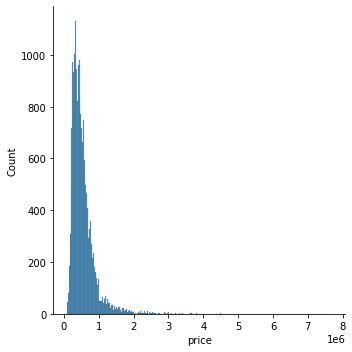

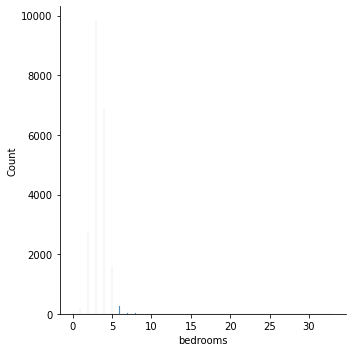

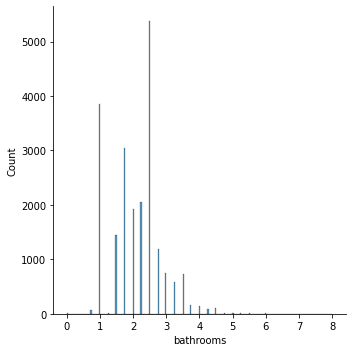

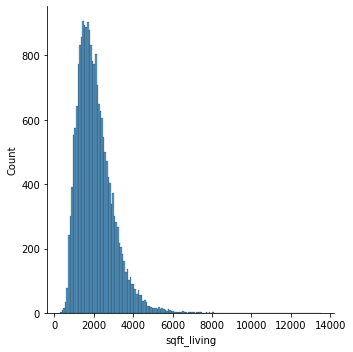

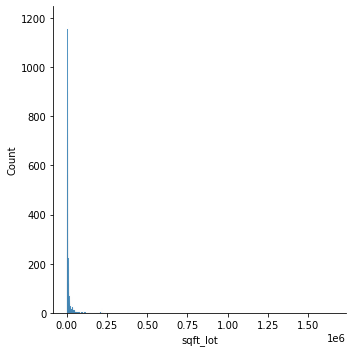

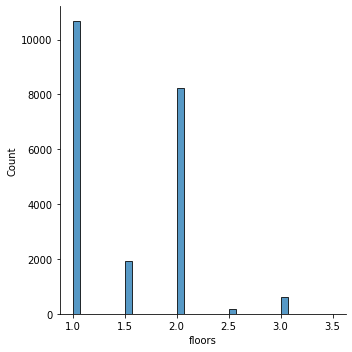

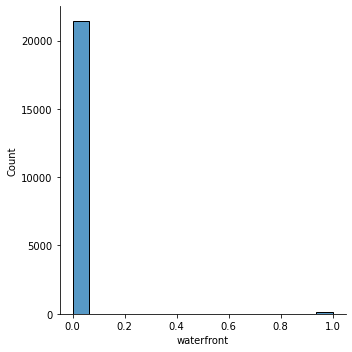

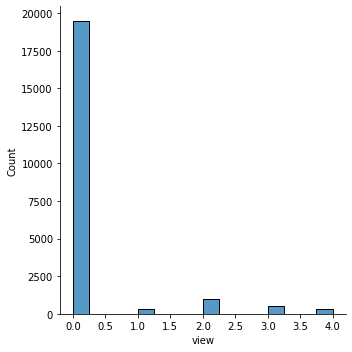

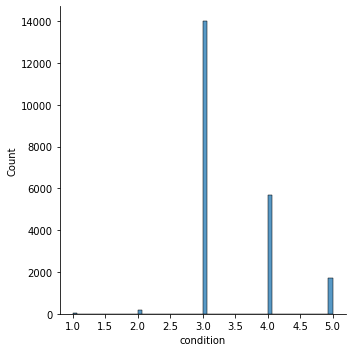

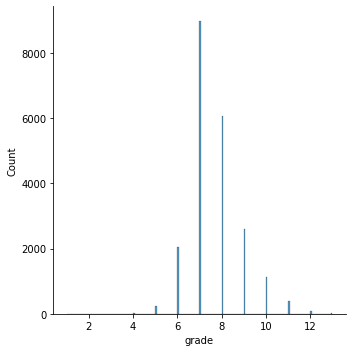

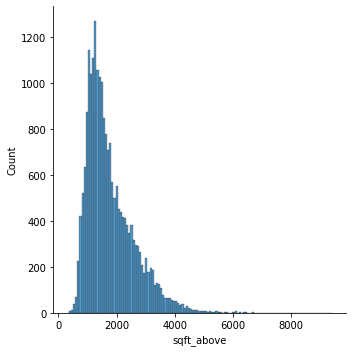

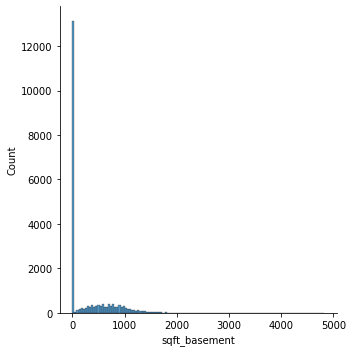

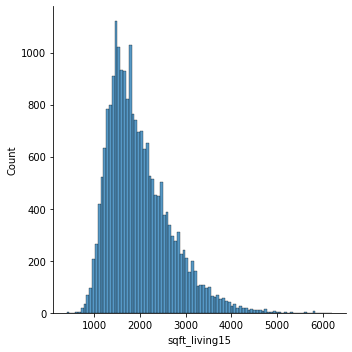

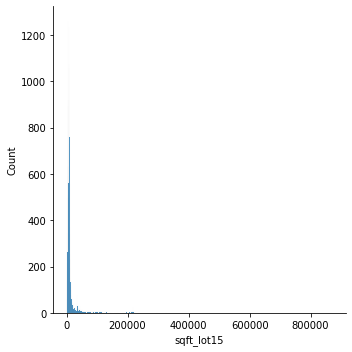

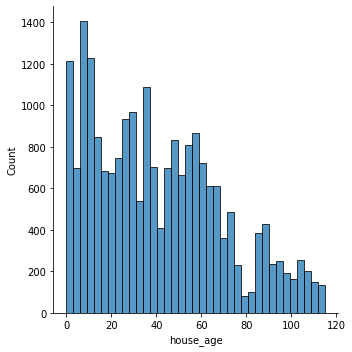

In [17]:
#plot
for i in df.columns:
    sns.displot(df[i])
    plt.show()

<Figure size 432x288 with 0 Axes>

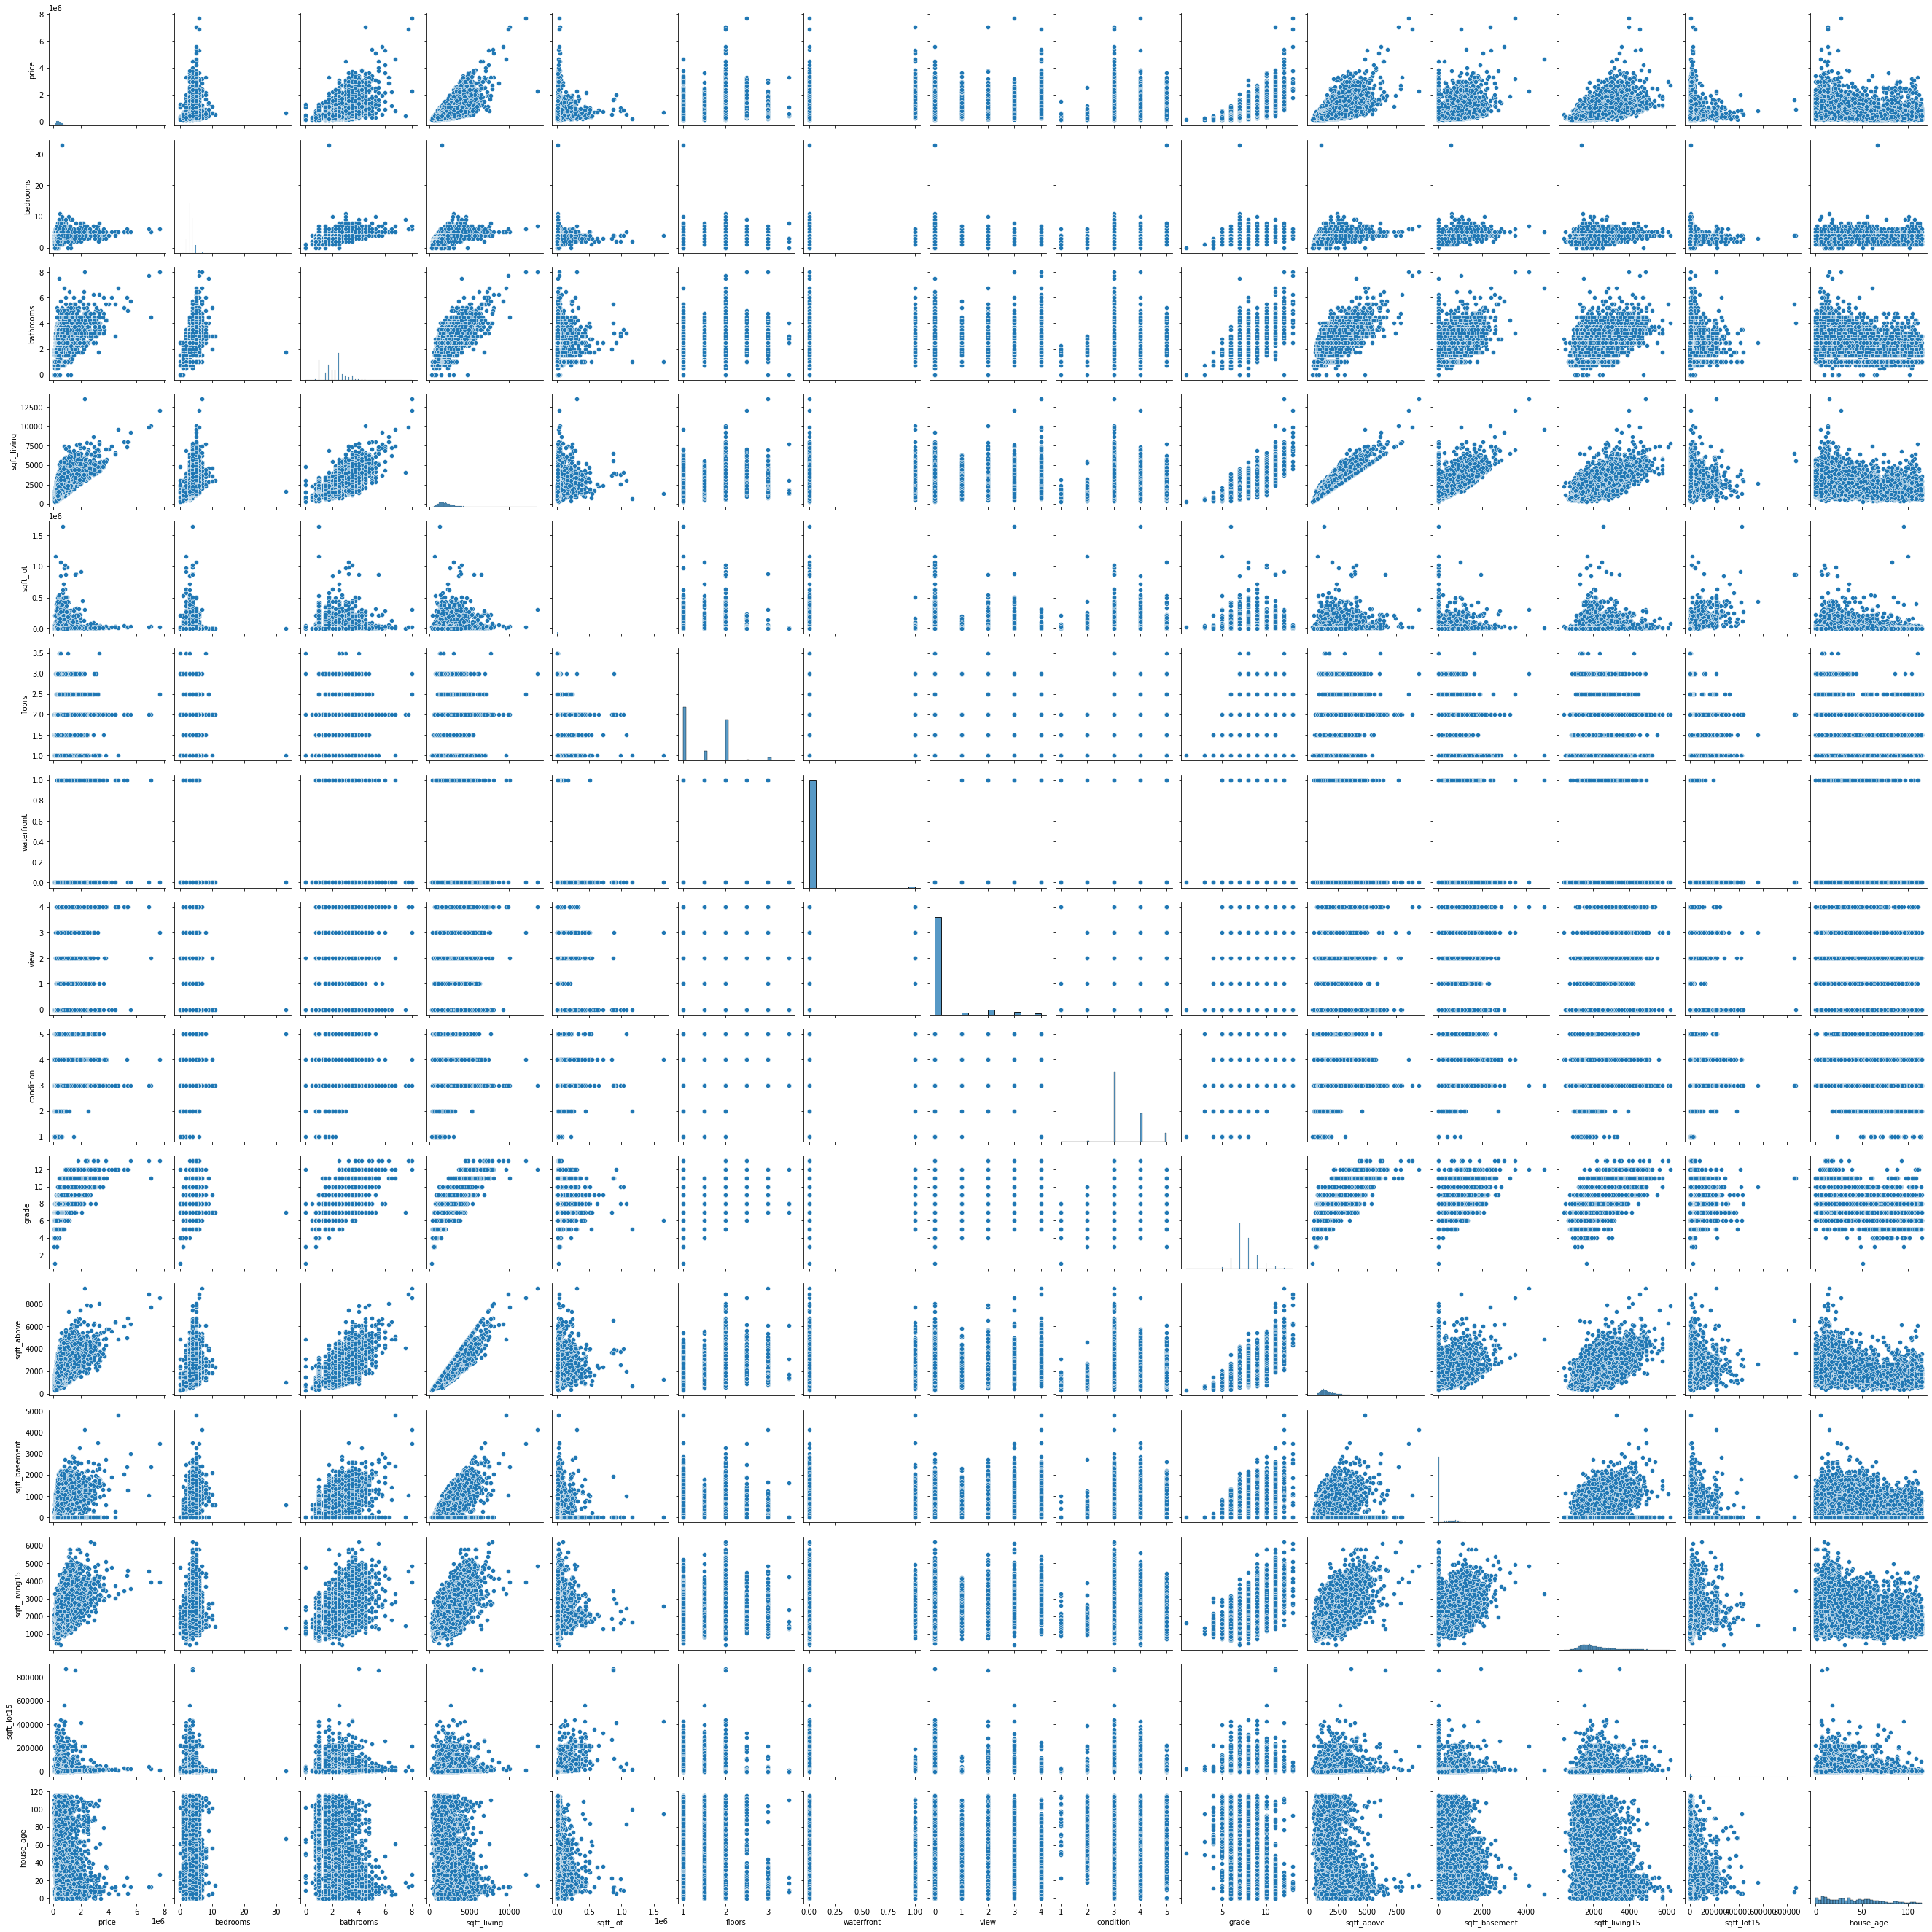

In [18]:
#pair plot
plt.figure()
sns.pairplot(df)
plt.show()

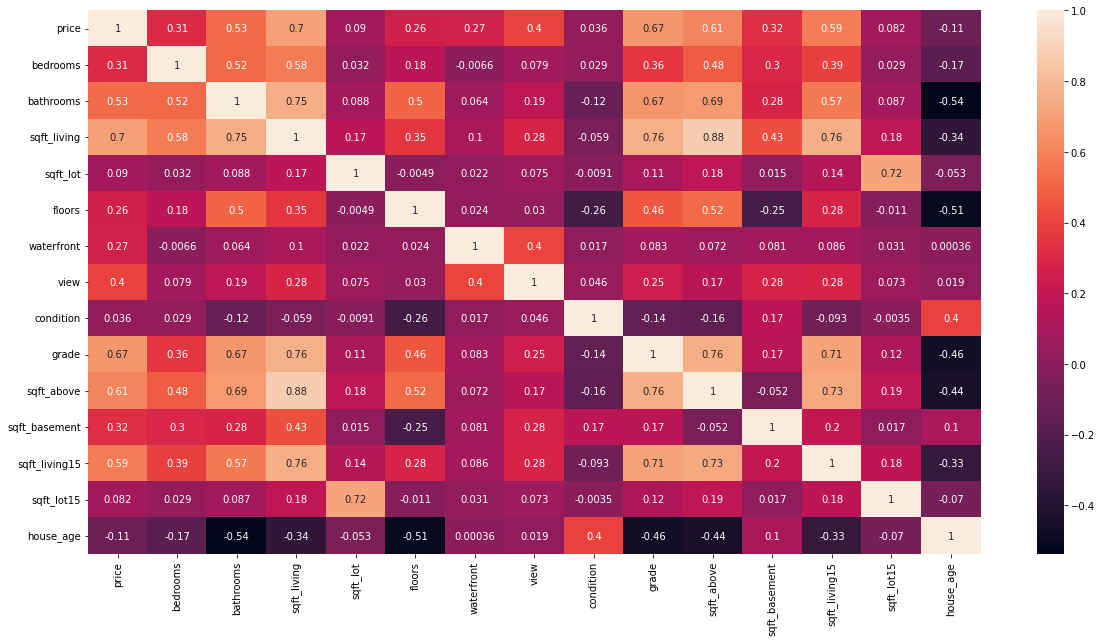

In [19]:
#heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

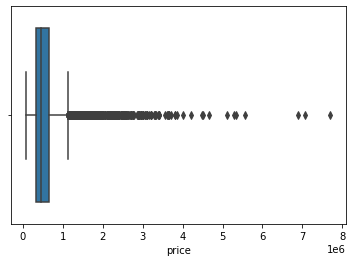

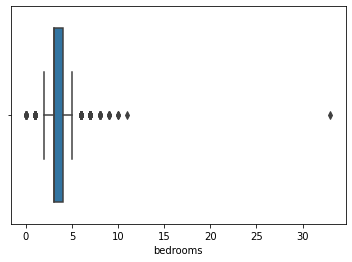

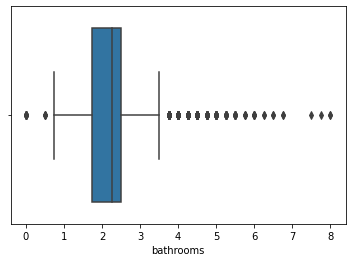

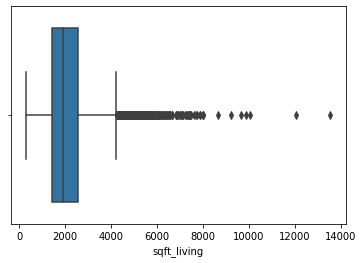

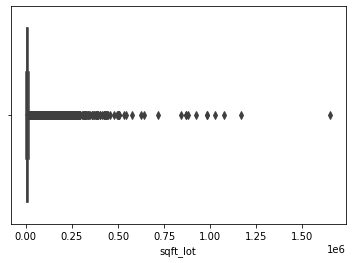

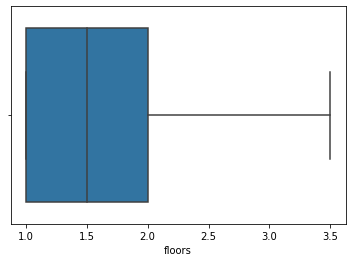

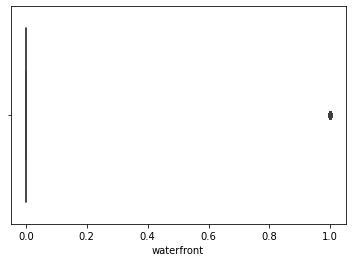

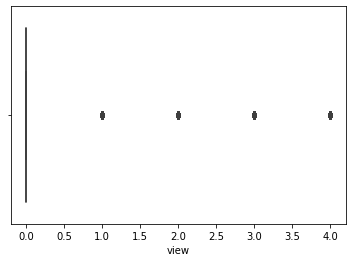

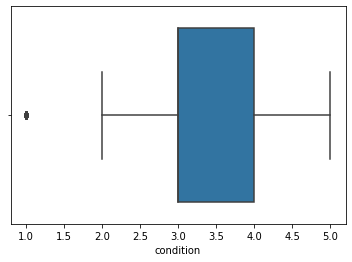

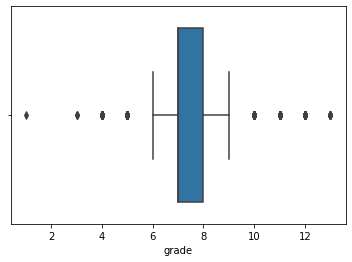

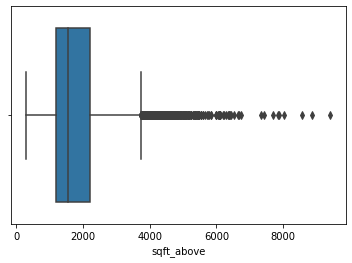

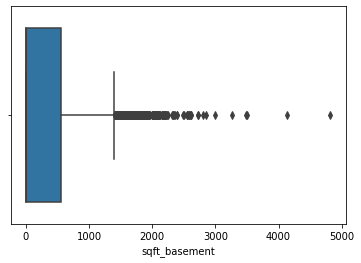

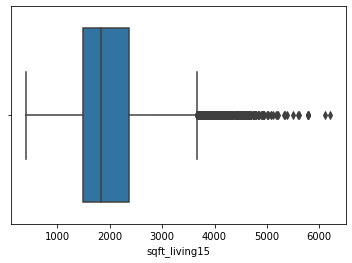

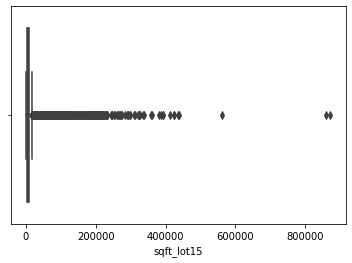

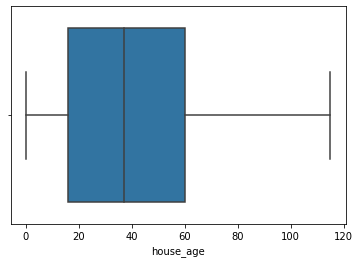

In [20]:
#boxplot
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.show()

In [21]:
#split data into in/output
x = df.drop('price', axis=1)
y = df['price']

In [22]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,23.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28.0


In [23]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [27]:
print(x.shape)
print(y.shape)

(21595, 14)
(21595,)


In [89]:
#model
model = keras.Sequential()
model.add(layers.Dense(14,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1))

In [90]:
model.compile(loss='mse',optimizer='adam', metrics=['mse','mae'])
hist = model.fit(x,y,validation_split=0.33,batch_size=32,epochs=25)
#(loss=training loss, val_loss=validation loss)

Epoch 1/25
453/453 [==============================] - 2s 2ms/step - loss: 362540630016.0000 - mse: 362540630016.0000 - mae: 473378.9062 - val_loss: 350206951424.0000 - val_mse: 350206951424.0000 - val_mae: 470872.8750
Epoch 2/25
453/453 [==============================] - 1s 2ms/step - loss: 296847376384.0000 - mse: 296847376384.0000 - mae: 406101.8125 - val_loss: 273459265536.0000 - val_mse: 273459265536.0000 - val_mae: 397379.2188
Epoch 3/25
453/453 [==============================] - 1s 2ms/step - loss: 204960546816.0000 - mse: 204960546816.0000 - mae: 308178.5938 - val_loss: 158718083072.0000 - val_mse: 158718083072.0000 - val_mae: 263112.5625
Epoch 4/25
453/453 [==============================] - 1s 2ms/step - loss: 109569867776.0000 - mse: 109569867776.0000 - mae: 197961.5781 - val_loss: 82381062144.0000 - val_mse: 82381062144.0000 - val_mae: 180549.0000
Epoch 5/25
453/453 [==============================] - 1s 2ms/step - loss: 75015512064.0000 - mse: 75015512064.0000 - mae: 168350.0

In [92]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 14)                210       
                                                                 
 dense_19 (Dense)            (None, 4)                 60        
                                                                 
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 275
Trainable params: 275
Non-trainable params: 0
_________________________________________________________________


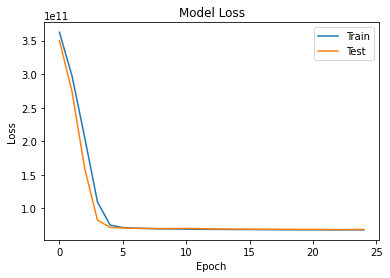

In [91]:
#training plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'],loc='upper right')
plt.show()

In [93]:
#prediction
x_pred = np.array([[2,3,1280,5550,1,0,0,4,7,2280,0,1440,5750,60]])
x_pred = np.array(x_pred,dtype=np.float64)
y_pred = model.predict(x_pred)
print('x = ', x_pred, '\ny = ', y_pred[0])

x =  [[2.00e+00 3.00e+00 1.28e+03 5.55e+03 1.00e+00 0.00e+00 0.00e+00 4.00e+00
  7.00e+00 2.28e+03 0.00e+00 1.44e+03 5.75e+03 6.00e+01]] 
y =  [464321.12]


In [94]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [100]:
x_pred = np.array([[3,1,1180,5650,1,0,0,3,7,1180,0,1340,5650,59.0]])
x_pred = np.array(x_pred,dtype=np.float64)
y_pred = model.predict(x_pred)
print('x = ', x_pred[0], '\ny = ', y_pred[0][0])

x =  [3.00e+00 1.00e+00 1.18e+03 5.65e+03 1.00e+00 0.00e+00 0.00e+00 3.00e+00
 7.00e+00 1.18e+03 0.00e+00 1.34e+03 5.65e+03 5.90e+01] 
y =  331369.8
